In [2]:
import pandas as pd
from matplotlib_venn import venn3, venn3_circles
import os
import json
from matplotlib import pyplot as plt
import upsetplot as usp

In [3]:
# load the config files and the variables from the upset_plot-section of the config file
config_path = "/home/reinhold/Daten/OPEN_4ds/generated_config"
config_filename = "config_viz.json"
f = open(os.path.join(config_path, config_filename))
IO_json = json.load(f)

###############################################################################
## switch between the two different variables
###############################################################################
var = "per_pm_id"
#var = "per_pm_id_date"
root_data_dir_name = IO_json["root_data_dir_name"]
input = IO_json["summary_plots"]["input"][var]
dataset_labels = IO_json["summary_plots"]["dataset_labels"]
output = IO_json["summary_plots"]["upsetplot_output"][var]

cols = []
for ds in dataset_labels:
    cols.append(ds)
print(cols)

['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS_Uploader)', 'OpenAPS (AAPS_Uploader)']


In [25]:

df = pd.read_csv(os.path.join(root_data_dir_name, input[0], input[1]), header=0, parse_dates=[1], index_col=0)
for i in range(len(dataset_labels)):
    df[cols[i]] = ~pd.isna(df[f"pm_id_{i}"])

df1 = df[cols]
print(df1)

     OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS_Uploader)  \
26           True          False                     False   
21           True          False                     False   
23           True          False                     False   
24           True          False                     False   
56           True          False                     False   
..            ...            ...                       ...   
202         False          False                     False   
197         False          False                     False   
195         False          False                     False   
219         False          False                     False   
215         False          False                     False   

     OpenAPS (AAPS_Uploader)  
26                     False  
21                     False  
23                     False  
24                     False  
56                     False  
..                       ...  
202                     True  
197    

In [24]:

df2 = usp.from_indicators(df1)  # returns a series
print(df2)
print(df2.axes)

OpenAPS (NS)  OPENonOH (NS)  OPENonOH (AAPS_Uploader)  OpenAPS (AAPS_Uploader)
True          False          False                     False                      1.0
                                                       False                      1.0
                                                       False                      1.0
                                                       False                      1.0
                                                       False                      1.0
                                                                                 ... 
False         False          False                     True                       1.0
                                                       True                       1.0
                                                       True                       1.0
                                                       True                       1.0
                                                       True  

created image: /home/reinhold/Daten/OPEN_4ds/img/upsetplot_per_pm_id.png


<Figure size 1080x1080 with 0 Axes>

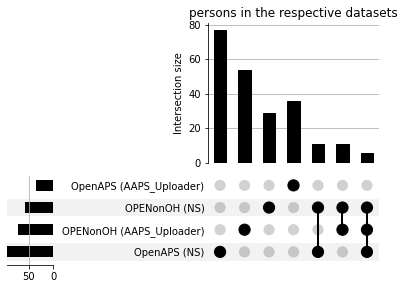

In [6]:
os.makedirs(os.path.join(root_data_dir_name, output[0]), exist_ok=True)
plt.rcParams["font.size"] = 10.0
plt.rcParams.update({"figure.facecolor" : (1.0, 1.0, 1.0, 1.0), "savefig.facecolor": (1.0, 1.0, 1.0, 1.0)})
plt.figure(figsize=(15,15))
plt.tight_layout()
usp.plot(df2, subset_size='count')
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")



In [7]:
# upset = usp.UpSet(df2, subset_size='count', intersection_plot_elements=3)
# upset.plot()
#upset.add_catplot(value='median_value', kind='strip', color='blue')
#upset.add_catplot(value='AGE', kind='strip', color='black')


In [21]:
# for venn3 diagramm
output = IO_json["summary_plots"]["venn3plot_output"][var]
cols2 = cols[0:2]
cols2.append(cols[3])
print(cols,cols2)
df_v1 = df2[df2[cols[2]]==True].groupby(cols2, dropna=False).agg("count")
print(df_v1)
#print(type(df_v1))
#df_v1.info()


['OpenAPS (NS)', 'OPENonOH (NS)', 'OPENonOH (AAPS_Uploader)', 'OpenAPS (AAPS_Uploader)'] ['OpenAPS (NS)', 'OPENonOH (NS)', 'OpenAPS (AAPS_Uploader)']


KeyError: 'OPENonOH (AAPS_Uploader)'

(False, False, False, True) 36
(False, False, True, False) 54
(False, True, False, False) 29
(False, True, True, False) 11
(True, False, False, False) 77
(True, True, False, False) 11
(True, True, True, False) 6
{'0001': 36, '0010': 54, '0100': 29, '0110': 11, '1000': 77, '1100': 11, '1110': 6}
created image: /home/reinhold/Daten/OPEN_4ds/img/venn3plot_per_pm_id.png


/home/reinhold/.local/lib/python3.8/site-packages/matplotlib_venn/_venn3.py:47: UserWarning: All circles have zero area
  warnings.warn("All circles have zero area")


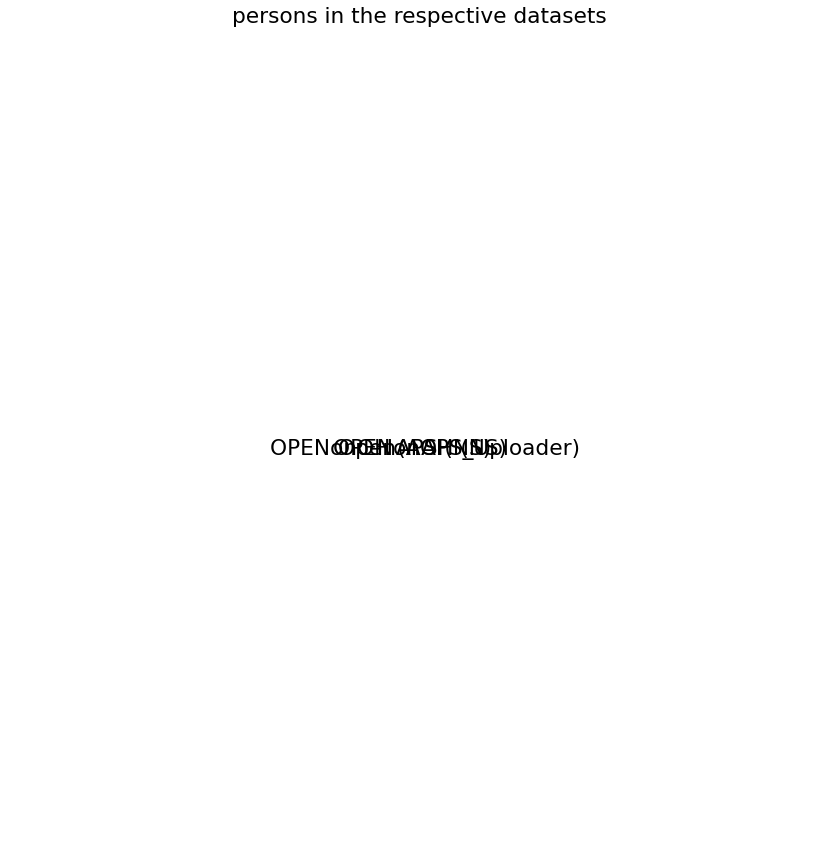

In [9]:
#print(df_v1.index)
#print(df_v1.index.names)
plt.rcParams["font.size"] = 18.0  # 10 by default
data = {}
for i in df_v1.index:
    print(i, df_v1.loc[i])
    i_str = "".join([str(int(i_k)) for i_k in i])
    data[i_str] = df_v1.loc[i]
print(data)

plt.figure(figsize=(15,15))
plt.tight_layout()
venn3(subsets = data, set_labels=df_v1.index.names)
plt.title(output[2])
plt.savefig(os.path.join(root_data_dir_name, output[0], output[1]), bbox_inches='tight')
print(f"created image: {os.path.join(root_data_dir_name, output[0], output[1])}")

#venn3(subsets = (data["100"], data["010"], data["110"], data["001"], data["101"], data["011"], data["111"]), set_labels=("OPENonOH", "OpenAPS_NS", "OPENonOH_AAPS_Uploader"), alpha=0.5)

In [52]:
# just for cross check: should return an empty dataframe for the artificial data, a dataframe with all true for the real data
df4 = df1[(df1[cols[0]]==True) & (df1[cols[1]]==True) & (df1[cols[2]]==True)]
print(df4)

Empty DataFrame
Columns: [dataset 0, dataset 1, dataset 2, dataset 3]
Index: []
